# Data Camp - Finch Beak Assessment
Author:   Brandon Touchet 

Data:     Sept. 5, 2020

## Table of Contents
* [Abstract](#abstract)
* [Introduction](#intro)
* [Methods](#methods)
    * [Beak Length](#length)
        * [Exploratory Data Analysis](#eda-length)
        * [Parameter Estimation](#parmest-length)
        * [Hypothesis Testing](#hypotest-length)
    * [Beak Depth](#depth)
        * [Exploratory Data Analysis](#eda-depth)
        * [Parameter Estimation](#parmest-depth)
        * [Hypothesis Testing](#hypotest-depth)
    * [Beak Shape Variation](#shape-var)
    * [Heritability](#genes)
* [Discussion](#discuss)
* [Conclusion](#conclusion)
* [References](#refs)
* [Appendix](#apdx)
    * [Helper Functions](#helpfuncs)
    * [Data Acquisition](#getdata)
        * [Download Data](#dldata)
        * [Load Local Data](#loaddata)


## Abstract <a class="anchor" id="abstract"></a>
Analyzing finch (bird) beak data from 1975 and 2012
First, EDA of data is a simple hypothesis test to get familir with the data
Hypothesis: are the beaks significantly different in 2012 compared to 1975? 
Method: ... explore data first

## Introduction <a class="anchor" id="abstract"></a>

Charles Darwin first coined the term evolution of species by studying the animals in the Galopagos Islands. Peter and Rosemary Grant have been studying the finches on the island. As part of their study they have been tagging the birds and recording the data over the past 40 years. The Grants have made their data available to the public

## Methods <a class="anchor" id="methods"></a>

Explore G. Scandens birds . . . "The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time." . . . 

Assumptions:
* Beak size changed (length and depth
* Beak size is normally distributed

Assessments:
* EDA

    The function appears to be working as expected. Now we can move onto the finch data. 

    **Our first goal is to check the distributions.** Though we may be tempted to work with the PDF (data.plot(kind='hist')), we should use the CDF instead. The PDF is susceptible to binning effects while the CDF is not.

    Therefore, let us check the CDF of the beak length and the beak depth. For comparison we will create a distribution from the mean value of the combined data set. In other words, we combine the 1975 and 2012 data sets and use this combined data set to create a distribution for comparison.

    The three distributions appears to be significantly different. Since we assume that the distributions are normal about a mean value we will compare the difference of the mean values for the distributions. To do this we will use permutation replicates.

* Parameter Estimation
* Hypothesis Test

    Because we can never prove something TRUE, only FALSE, we must setup out NULL hypothesis to prove it FALSE (aka disprove the NULL). In this sense, we assume that the two beak distributions from 1975 and 2012 are identical. Since they are identical and normally distributed the mean values of the distributions should be identical. Therefore, the difference of the distributions' means should approximate to zero. In the event that this mean value difference is not zero and is not a consequence of some weird anamolous statistical random chance, then and only then can we move onto testing if the distribution difference is due to evolution (heritability).

    Again, we assume that the distributions are identical. Therefore the difference of the mean values should be zero. However, there is a chance that a distribution was peculiar and cause the difference to be large. So, we want to see of all the permutations how many had a difference as large as our difference or bigger. In the case of beak length we see that 100% were as big or smaller.

    Because the above analysis shows that there is a significant difference we need to determine the likelihood of this difference arising from random chance. In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?


### Beak Length <a class='anchor' id='edabl'></a>

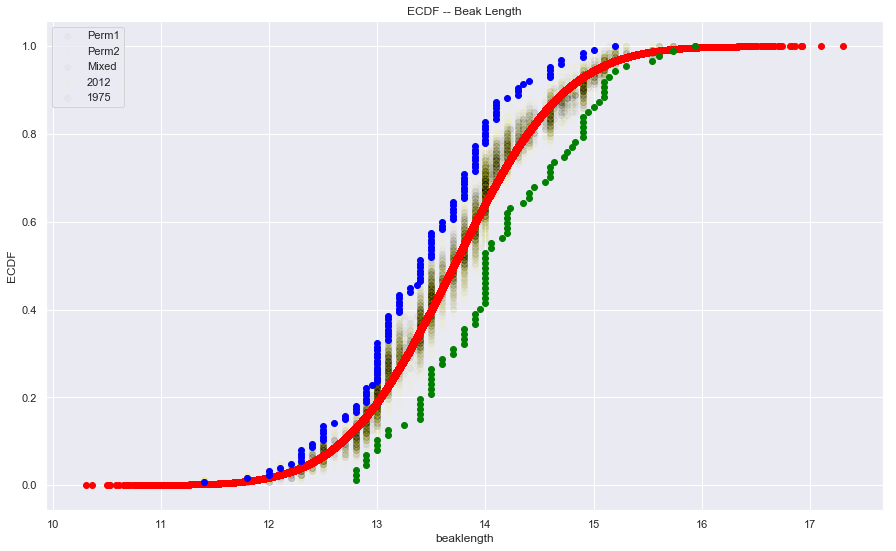

Difference of means = 0.6998959181826354 mm
95% confidence interval = [0.49969674 0.90029706] mm


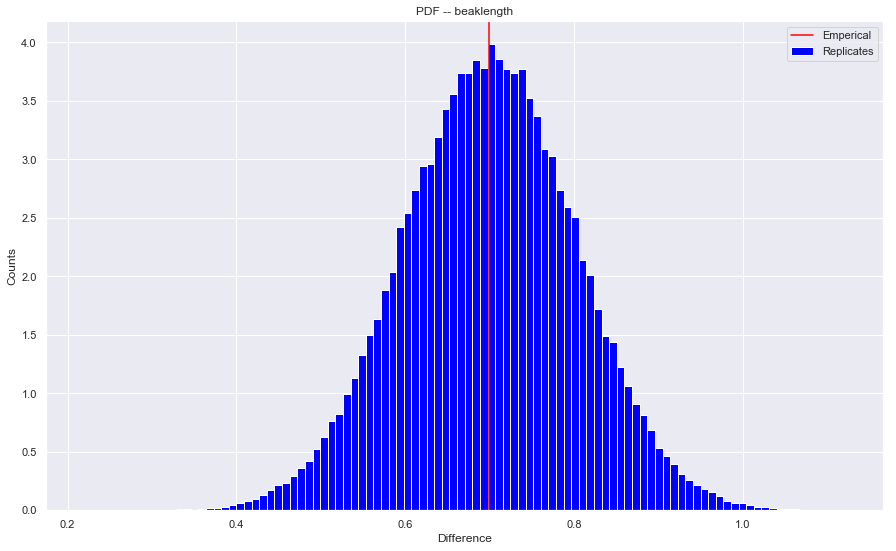

p = 0.000000


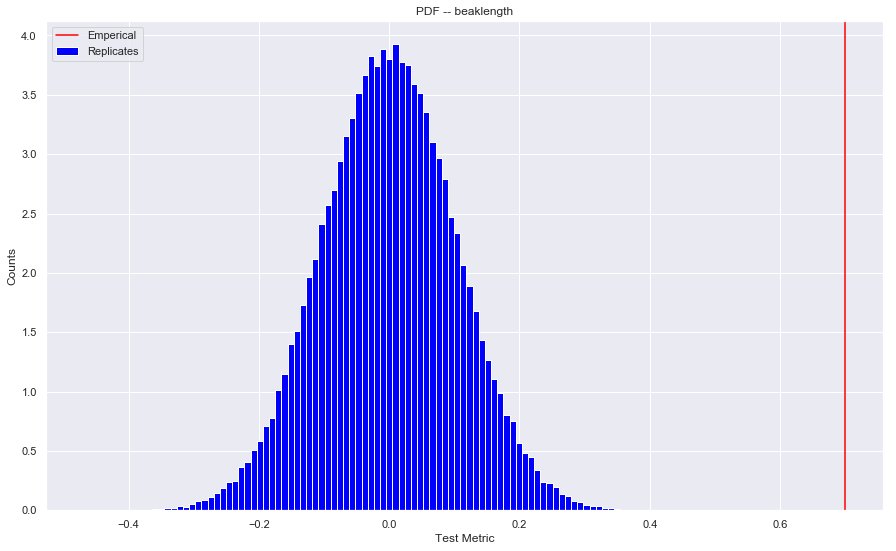

In [16]:
# Here we actually switch the data source, because we believe that the beaks have grown shorter but choose to check >=
data2 = df75['blength']   # dataframe for 1975 scanden beak length
data1 = df12['blength']   # dataframe for 2012 scanden beak length

report_function(data1,data2,'beaklength',1)

## Beak Depth <a class='anchor' id='edadepth'></a>

Just as we did with the beak length, we will perform exploratory data analysis to visually inspect the distributions and compare them against the combined.

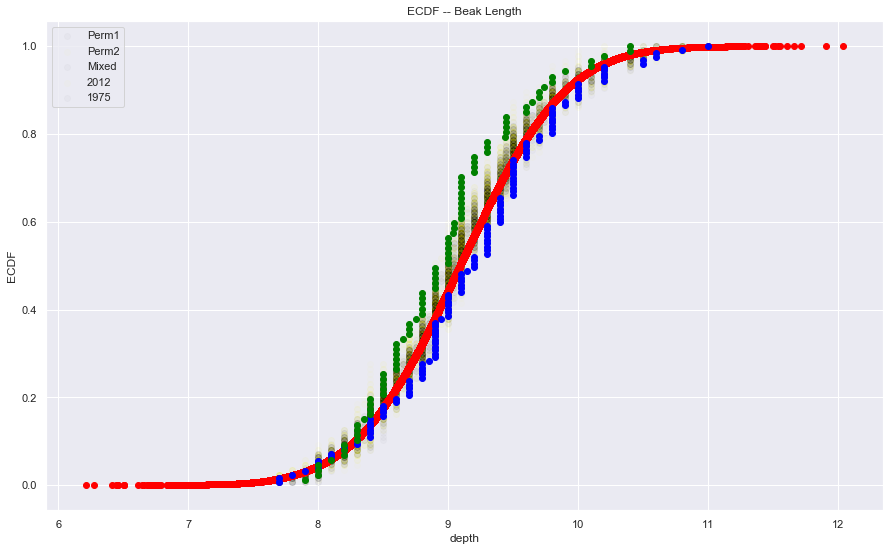

Difference of means = -0.2262204724409429 mm
95% confidence interval = [-0.39010241 -0.05942418] mm


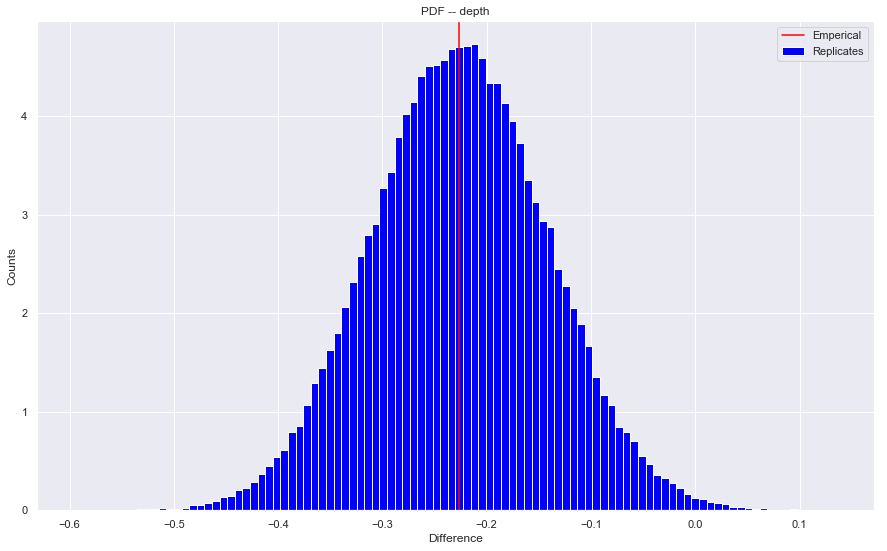

p = 0.996470


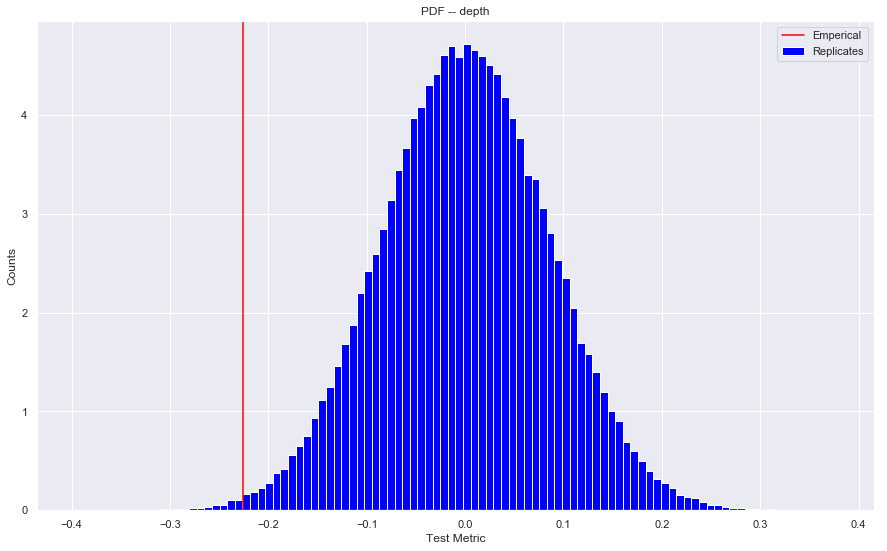

In [17]:
data2 = df75['bdepth']   # dataframe for 1975 scanden beak depth
data1 = df12['bdepth']   # dataframe for 2012 scanden beak depth

report_function(data1,data2,'depth',1)

### Beak Variation <a class='anchor' id='shape-var'></a>

The beaks definitely appear to have gotten shorter and deeper. We can better explore this relationship by looking at the correlation between depth and length through the two years with permutations.

In [18]:
bd_1975 = df75['bdepth']   # dataframe for 1975 scanden beak depth
bd_2012 = df12['bdepth']   # dataframe for 2012 scanden beak depth
bl_1975 = df75['blength']   # dataframe for 1975 scanden beak length
bl_2012 = df12['blength']   # dataframe for 2012 scanden beak length

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

KeyError: 'None of [[ 3 80 36 75 11 67  0 43 62 34 85 78 37 72 12 27 47 63  3 72 29 66 40 80\n 46 72 50 75 59  2 19 59 48 43 20 81 52 52 49 35 27 76 40 30 70 40 35 34\n 39 36 47 33 58 42 37 13 15 15 29 29 57 70 73 16 28 64 56 69  7 51 72 58\n  8 76 81 59 66 33 62 23  4 25 56 42 54 21 66]] are in the [index]'

In [147]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55736022 1.60150536]
2012: mean ratio = 1.4658342276847778 conf int = [1.44452333 1.48845286]


### Heritability <a class='anchor' id='genes'></a>

In [ ]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

In [150]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,pearson_r,1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,pearson_r,1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1]/ covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


NameError: name 'pearson_r' is not defined

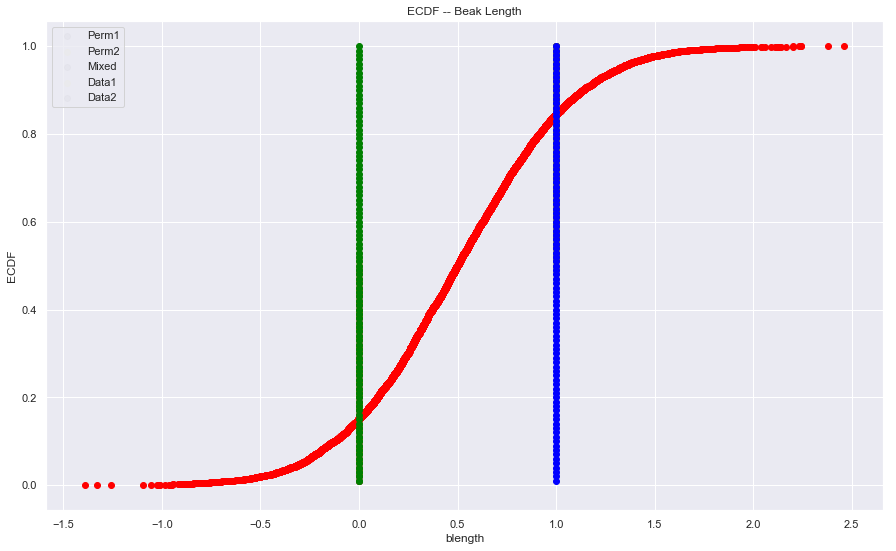

Difference of means = -1.0 mm
95% confidence interval = [-1. -1.] mm


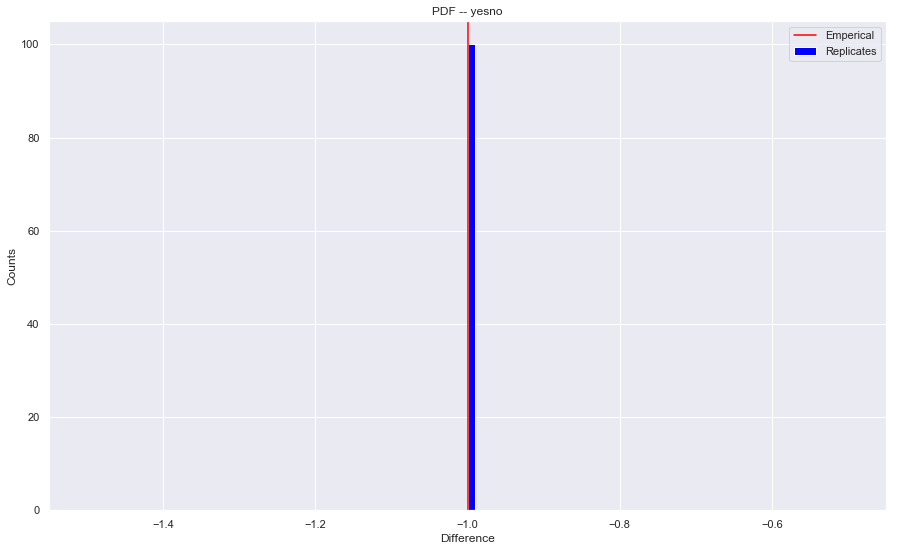

p = 1.0


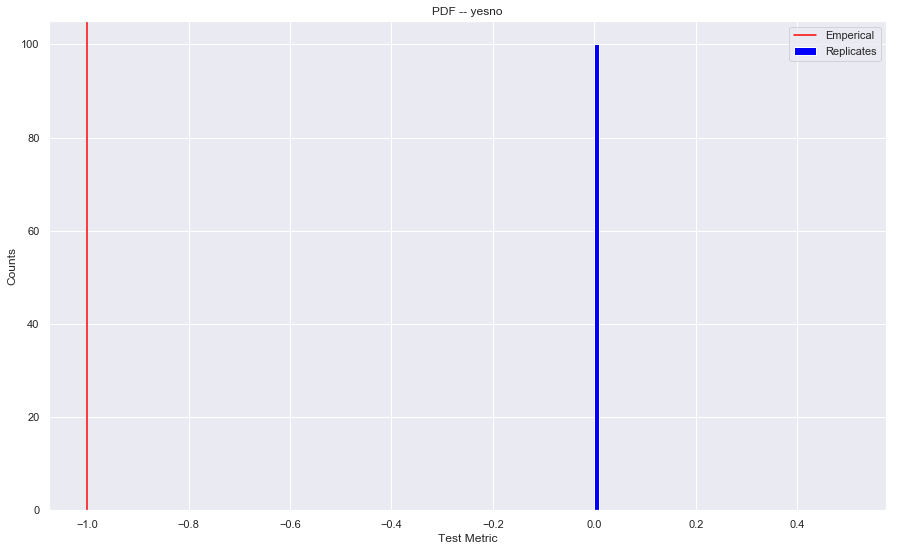

In [154]:
yeth = np.array([True*1]*100)
noth = np.array([False*1]*100)
report_function(yeth,noth,'yesno',1)

## Discussion <a class='anchor' id='discuss'></a>

We have shown that the beak shape has changed. This could mean that the beak function has changed based on mechanical leverage. This suggests the beaks are more adept at different foods. 

Based on these inferences we change check two more conditions:
1. Relationship between beak length and depth as a function of time
2. Historical food changes (e.g. die off/food source, change in food source shape)
3. Heritability

## Conclusion <a class='anchor' id='conclusion'></a>
Since the length has changed but the depth hasn't changed we can infer that the flowers must have changed or something else with their food. Finches generally eat seeds, especially seeds. 

## References <a class="anchor" id="refs"></a>
1. Grant, Peter R.; Grant, B. Rosemary (2013), Data from: 40 years of evolution. Darwin's finches on Daphne Major Island, Dryad, Dataset, https://doi.org/10.5061/dryad.g6g3h

## Appendix <a class='anchor' id='apdx'></a>

### Helper Functions <a class="anchor" id="helpfuncs"></a>

In [15]:
# Import package
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


def get_data(url,filename):
    '''
    Locally save csv files from Data Camp
    '''
    urlretrieve(url,filename)
    
def load_csv(filename):
    '''
    Load locally saved Data Camp csv files
    '''
    df = pd.read_csv(filename, sep=',')
    return df

def ecdf(data):
    '''
    Compute ECDF
    '''
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

def draw_bs_pairs_linreg(x, y, size=1):
    '''
    Perform pairs bootstrap for linear regression.
    '''

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


# Create permutation sample
def permutation_sample(data1, data2):
    '''
    Generate a permutation sample from two data sets.
    '''
    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

# Create permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    '''
    Generate multiple permutation replicates.
    '''
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates

def bootstrap_replicate_1d(data, func):
    '''
    Generate bootstrap replicate of 1D data.
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    '''
    Draw bootstrap replicates.
    '''
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates


def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,size=len(inds))
        bs_x, bs_y = x[bs_inds],y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates


# Create difference_of_mean function
def diff_of_means(data_1, data_2):
    '''
    Difference in means of two arrays.
    '''    
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)
    return diff


def eda_func(data1,data2,keyword):
    '''
    EXPLORATORY DATA ANALYSIS
    '''

    # Comparison Distro
    mix_mean = np.mean(np.concatenate([data1,data2]))
    mix_std = np.std(np.concatenate([data1,data2]))

    # Emperical Distros
    x,y = ecdf(np.random.normal(mix_mean, mix_std, 100000))
    x1,y1 = ecdf(data1)
    x2,y2 = ecdf(data2)
    
    # Plot Distros
    plt.figure(figsize=(15, 9))
    for _ in range(50):
        # Generate permutation samples
        perm_sample_1, perm_sample_2 = permutation_sample(data1,data2)


        # Compute ECDFs
        x_1, y_1 = ecdf(perm_sample_1)
        x_2, y_2 = ecdf(perm_sample_2)

        # Plot ECDFs of permutation sample
        _ = plt.scatter(x=x_1, y=y_1, color='black', alpha=0.02)
        _ = plt.scatter(x=x_2, y=y_2, color='yellow', alpha=0.02)
    
    plt.scatter(x=x, y=y,color='red',alpha=1.0);
    plt.scatter(x=x1, y=y1,color='blue',alpha=1.0);
    plt.scatter(x=x2, y=y2,color='green',alpha=1.0);
    plt.xlabel(keyword)
    plt.ylabel('ECDF')
    plt.title('ECDF -- Beak Length')
    plt.legend(['Perm1','Perm2','Mixed','2012','1975'])
    plt.savefig(keyword + '_eda.png')
    plt.show()
    
    
def parm_est(data1,data2,keyword):
    '''
    PARAMETER ESTIMATION
    '''
    # Compute the difference of the sample means: mean_diff
    mean_diff = np.mean(data2)-np.mean(data1)

    # Get bootstrap replicates of means
    replicates_1 = draw_bs_reps(data1,np.mean,100000)
    replicates_2 = draw_bs_reps(data2,np.mean,100000)

    # Compute samples of difference of means: bs_diff_replicates
    replicates_diff = replicates_2-replicates_1

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(replicates_diff,[2.5,97.5])

    # Print the results
    print('Difference of means =', mean_diff, 'mm')
    print('95% confidence interval =', conf_int, 'mm')
    
    # Plot replicates
    plt.figure(figsize=(15, 9))
    plt.hist(replicates_diff,color='blue',normed=True,bins=100)
    plt.axvline(x=mean_diff,color = 'red')
    plt.xlabel('Difference')
    plt.ylabel('Counts')
    plt.title('PDF -- ' + keyword)
    plt.legend(['Emperical','Replicates'])
    plt.savefig(keyword + '_parmest.png')
    plt.show()
    
    
def hypo_test(data1,data2,keyword,gtls=1):
    '''
    HYPOTHESIS TESTING
    '''
    # Compute the difference of the sample means: mean_diff
    mean_diff = np.mean(data2)-np.mean(data1)
    
    # Compute mean of combined data set: combined_mean
    combined_mean = np.mean(np.concatenate((data1, data2)))

    # Shift the samples
    data1_shifted = data1-np.mean(data1)+combined_mean
    data2_shifted = data2-np.mean(data2)+combined_mean

    # Get bootstrap replicates of shifted data sets
    replicates_data1 = draw_bs_reps(data1_shifted,np.mean,100000)
    replicates_data2 = draw_bs_reps(data2_shifted,np.mean,100000)

    # Compute replicates of difference of means: bs_diff_replicates
    replicates_diff = replicates_data2-replicates_data1

    # Compute the p-value
    if gtls == 0:
        p = np.sum(replicates_diff <= mean_diff) / len(replicates_diff)
    else :            
        p = np.sum(replicates_diff >= mean_diff) / len(replicates_diff)

    # Print p-value
    print("p = {:.6f}".format(p))
    
    # Plot test
    plt.figure(figsize=(15, 9))
    plt.hist(replicates_diff,color='blue',normed=True,bins=100)
    plt.axvline(x=mean_diff,color = 'red')
    plt.xlabel('Test Metric')
    plt.ylabel('Counts')
    plt.title('PDF -- ' + keyword)
    plt.legend(['Emperical','Replicates'])
    plt.savefig(keyword + '_test.png')
    plt.show()

    

def report_function(data1,data2,keyword,gtls=1): 
    eda_func(data1,data2,keyword)
    parm_est(data1,data2,keyword)
    hypo_test(data1,data2,keyword,gtls)


#### Test Analysis - 1

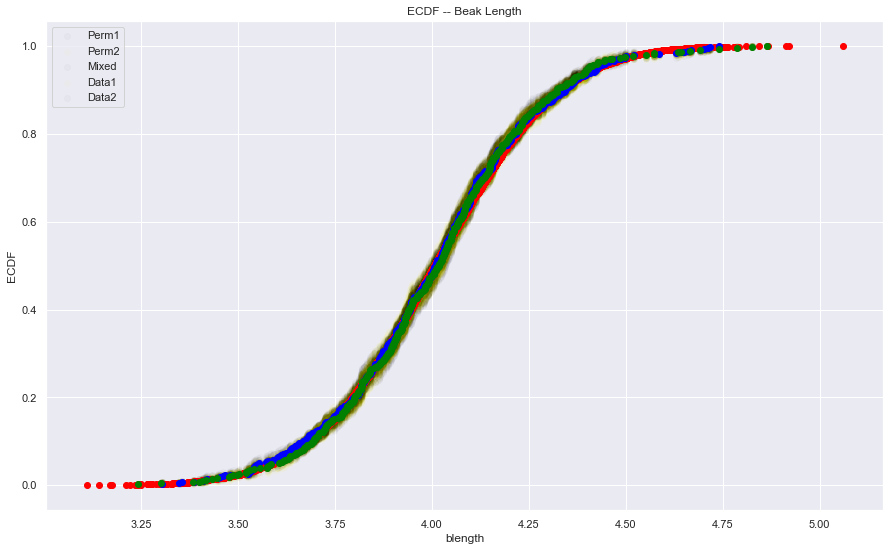

Difference of means = 0.0036864308105837296 mm
95% confidence interval = [-0.02786967  0.03533576] mm


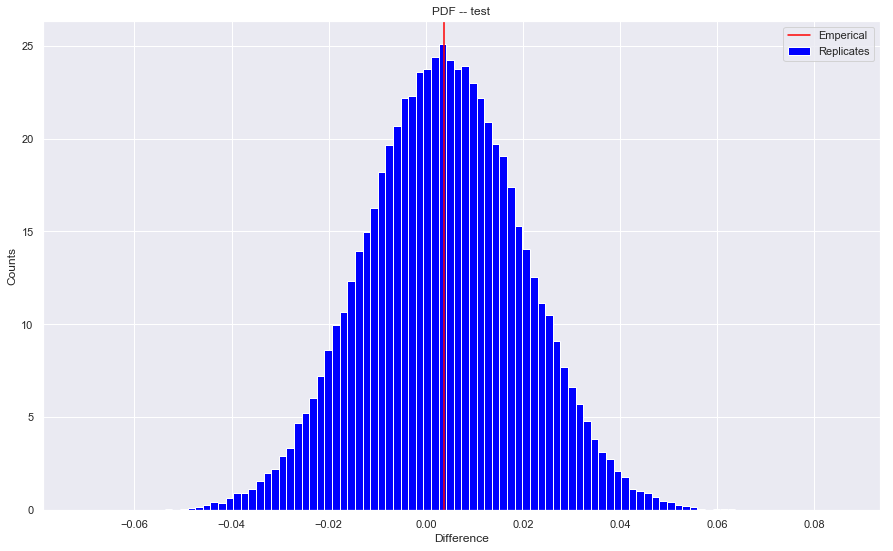

p = 0.40802


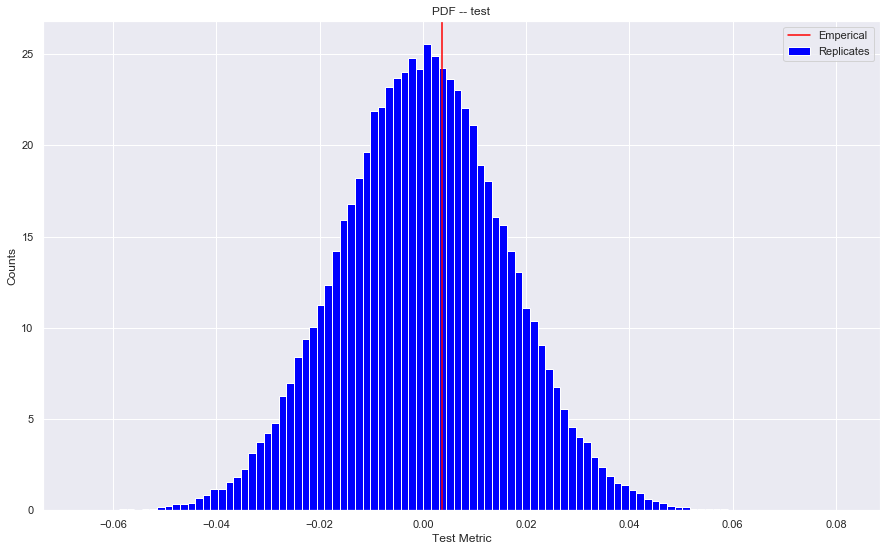

In [132]:
mu = 4 # mean/average value
sig = 0.25 # standard deviation
num = 20000 # number of data points
data = np.random.normal(mu, sig, num)
permuted_data = np.random.permutation(data)
# Split the permuted array into two: perm_sample_1, perm_sample_2
data1 = permuted_data[:500]
data2 = permuted_data[-500:]

report_function(data1,data2,'test',1)

#### Test Analysis - 2

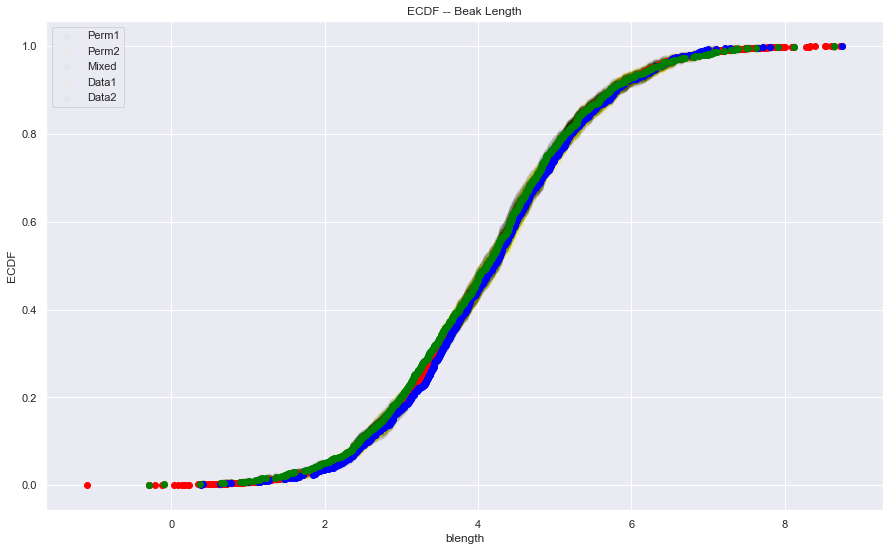

Difference of means = -0.09797422497452057 mm
95% confidence interval = [-0.20919364  0.01404563] mm


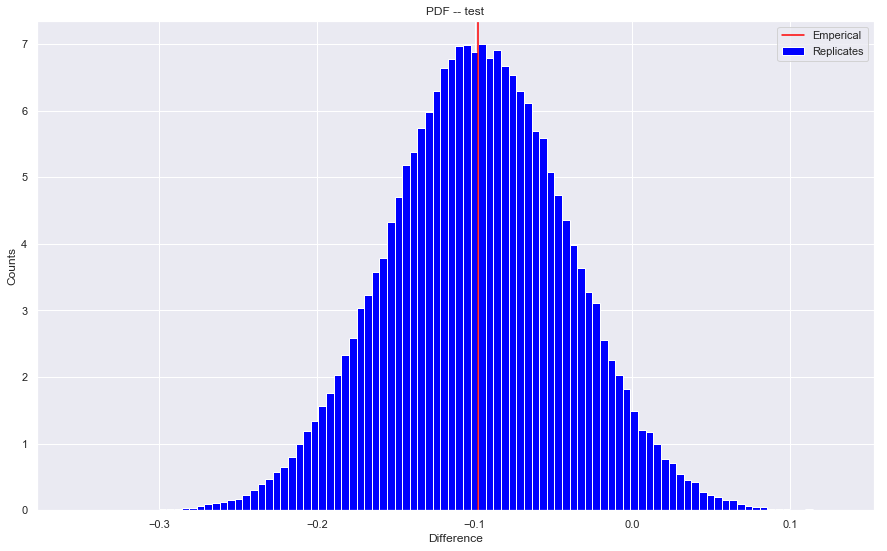

p = 0.9569


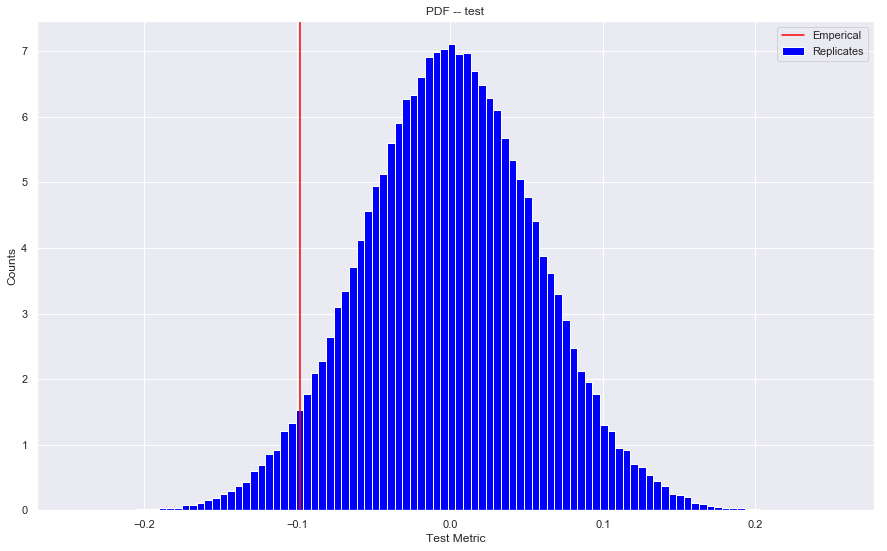

In [133]:
mu1 = 4.2 # mean/average value
mu2 = 4.1
sig1 = 1.25 # standard deviation
sig2 = 1.3
num = 1000 # number of data points

data1 = np.random.normal(mu1, sig1, num)
data2 = np.random.normal(mu2, sig2, num)

report_function(data1,data2,'test',1)

### Data Acquisition <a class='anchor' id='getdata'></a> 

#### Download Data <a class="anchor" id="dldata"></a>
* url1 = 'https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv'
* url2 = 'https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv'

In [ ]:
# assign url to 1975 finch data from DataCamp
url1 = 'https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv'
# assign url to 2012 finch data from DataCamp
url2 = 'https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv'
# heritability
url3 = 'https://assets.datacamp.com/production/repositories/470/datasets/7ff772e1f4e99ed93685296063b6e604a334236d/scandens_beak_depth_heredity.csv'

url4 = 'https://assets.datacamp.com/production/repositories/470/datasets/532cb2fecd1bffb006c79a28f344af2290d643f3/fortis_beak_depth_heredity.csv'


get_data(url1,'finch_beaks_1975.csv')
get_data(url2,'finch_beaks_2012.csv')
get_data(url3,'scandens_beak_depth_heredity.csv')
get_data(url4,'fortis_beak_depth_heredity.csv')

#### Load Local Data <a class='anchor' id='loaddata'></a>

In [4]:
# 1975 Finch Data
filename = 'finch_beaks_1975.csv'
df75 = load_csv(filename)
# 2012 Finch Data
filename = 'finch_beaks_2012.csv'
df12 = load_csv(filename)

display(df75.head())
display(df12.head())

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


We want consistent headers so we will rename

In [5]:
# we have a difference in column names. We will rename the 1975 data frame
df75.rename(columns={'Beak length, mm':'blength',
                    'Beak depth, mm':'bdepth'}, inplace=True) 

display(df75.head())

,band,species,blength,bdepth
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [6]:
# Select only 'scandens'
df75 = df75[df75.species == 'scandens']
df12 = df12[df12.species == 'scandens']